# Face detection
Using CNN + LSTM, which is LRCN.

## Outline
* Step 1: Assume you have a dataset of videos
* Step 2: Preprocess the dataset
* Step 3: Split the data into train and test dataset
* Step 4: Implement the LRCN approach
  * Step 4.1: Construct the model
  * Step 4.2: Compile and train the model
  * Step 4.3: Plot the model's loss and accuracy curves
* Step 5: Test the model on a video
* Step 6: Convert the model for camera

In [14]:
# importing the modules
import numpy as np
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

In [2]:
# setting up numpy, python and tensorflow seeds
# to get consistent results on every execution
seed_constant = 25
np.random.seed(seed_constant)           # numpy seed
random.seed(seed_constant)              # python seed
tf.random.set_seed(seed_constant)       # tensorflow seed

## Step 2: Preprocess the dataset

In this section we will create functions to preprocess the data. We will create a pipeline which we can later use to preprocess our frame data.

In [3]:
# Specifying hyperparameters as constants

# specify the resolution to which each frame will be resized
IMAGE_HEIGHT, IMAGE_WIDTH = 512, 512

# specify the number of frames to be fed into model as one sequence
SEQUENCE_LENGTH = 20

In [ ]:
def preprocess_frame((image_height, im)):
    '''
    This function takes one frame and outputs the preprocessed frame.
    Args:
        (image_height, image_width)
    '''

In [6]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC

In [7]:
wiring = wirings.AutoNCP(8,1)  # 8 neurons in total, 1 ouput (motor neuron)

In [8]:
# construct the CNN + NCP network
def create_cnn_ncp_model():
    '''
    This function creates the CNN NCP model.
    Returns:
        model: the required CNN NCP model.
    '''
    
    # we will sequential model for model construction
    model = tf.keras.models.Sequential()
    
    # -----------------begin model architecture---------------
    model.add(TimeDistributed(
        Conv2D(16, (3,3), padding='same', activation='relu'),
        input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    ))
    model.add(TimeDistributed(MaxPooling2D(4,4)))
    model.add(TimeDistributed(Dropout(0.25)))
  
    model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(4,4)))
    model.add(TimeDistributed(Dropout(0.25)))
  
    model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(2,2)))
    model.add(TimeDistributed(Dropout(0.25)))
  
    model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(2,2)))
    # model.add(TimeDistributed(Dropout(0.25)))
  
    model.add(TimeDistributed(Flatten()))
    
    # model.add(LSTM(32))
    model.add(LTC(wiring, return_sequences=True))
    # model.add(Dense(4, activation='softmax'))
    
    #------------------end model architecture------------------

    # display model summary
    model.summary()

    # return the constructed model
    return model

In [9]:
model = create_cnn_ncp_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeD  (None, 20, 512, 512, 16   448       
 istributed)                 )                                   
                                                                 
 time_distributed_13 (TimeD  (None, 20, 128, 128, 16   0         
 istributed)                 )                                   
                                                                 
 time_distributed_14 (TimeD  (None, 20, 128, 128, 16   0         
 istributed)                 )                                   
                                                                 
 time_distributed_15 (TimeD  (None, 20, 128, 128, 32   4640      
 istributed)                 )                                   
                                                                 
 time_distributed_16 (TimeD  (None, 20, 32, 32, 32)   

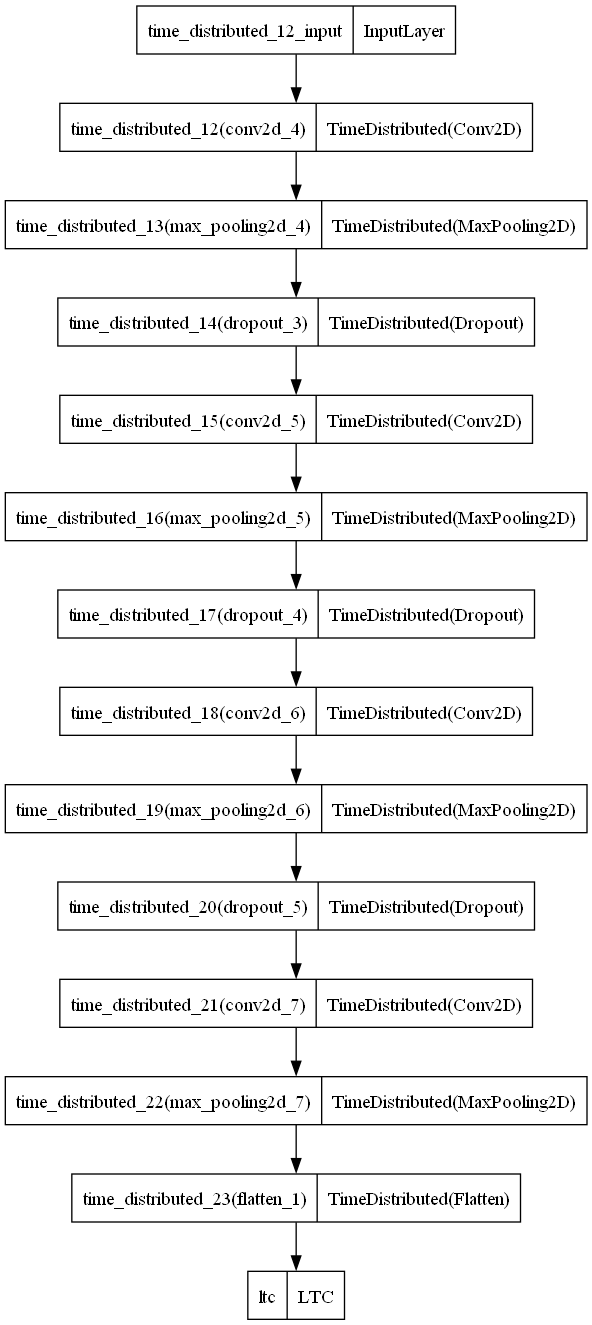

In [10]:
plot_model(model)

KeyboardInterrupt: 

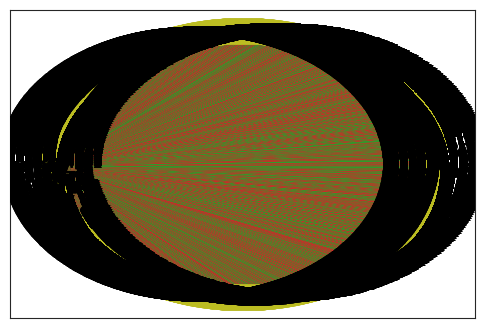

In [16]:
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = wiring.draw_graph(
    draw_labels=True, 
    neuron_colors={"command":"tab:cyan"}
)
plt.legend(
    handles=legend_handles, 
    loc="upper center", 
    bbox_to_anchor=(1,1)
)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()